In [1]:
import pandas as pd

# Definir los nombres de las columnas ya que el archivo no incluye encabezados
columnas = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
            'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
            'hours-per-week', 'native-country', 'income']

# Cargar el dataset
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\MACHINE LEARNING\tarea desbalance y valores null\adult.data', header=None, names=columnas, na_values=' ?')


In [2]:
print(df.isnull().sum())  # Ver cuántos valores faltan en cada columna


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [3]:
df = df.dropna()  # Elimina filas con valores faltantes


In [4]:
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)  # Rellena con la moda de cada columna


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Eliminar espacios en los extremos de las etiquetas de clase
df['income'] = df['income'].str.strip()

# Asegurarse de que la columna sea categórica
df['income'] = df['income'].astype('category')


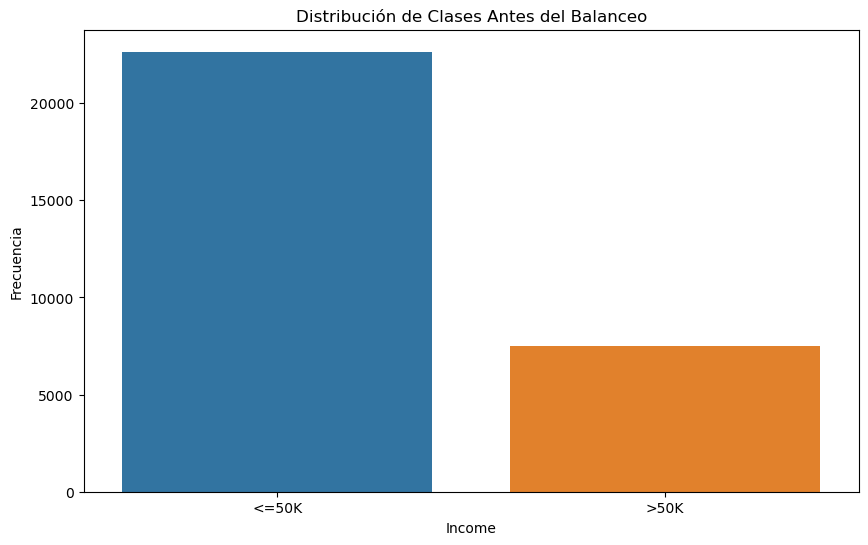

In [7]:
# Graficar la distribución de las clases
plt.figure(figsize=(10, 6))
sns.countplot(x='income', data=df)  # Especificar el eje x como 'income'
plt.title('Distribución de Clases Antes del Balanceo')
plt.xlabel('Income')
plt.ylabel('Frecuencia')
plt.show()


In [8]:
#aumentar numero de instancias de la clase menos representada
from imblearn.over_sampling import SMOTE

X = df.drop('income', axis=1)  # Características
y = df['income']  # Variable objetivo

# Convertir variables categóricas en variables dummy
X = pd.get_dummies(X)

# Aplicar SMOTE para hacer balance de clases
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


In [10]:
# Convertir el dataset resampleado en un DataFrame
df_resampled = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)

# Guardar el dataset transformado
df_resampled.to_csv(r'C:\Users\Lenovo\Desktop\MACHINE LEARNING\tarea desbalance y valores null\adult_transformed.csv', index=False)


In [11]:
### ver el desbalance
import pandas as pd

# Cargar el dataset transformado
df_resampled = pd.read_csv(r'C:\Users\Lenovo\Desktop\MACHINE LEARNING\tarea desbalance y valores null\adult_transformed.csv')


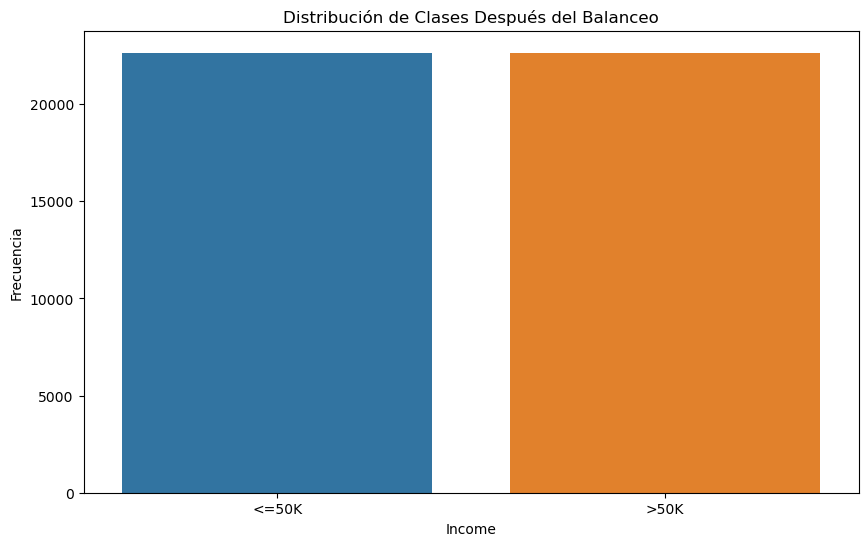

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar la distribución de clases después del balanceo
plt.figure(figsize=(10, 6))
sns.countplot(x='income', data=df_resampled)
plt.title('Distribución de Clases Después del Balanceo')
plt.xlabel('Income')
plt.ylabel('Frecuencia')
plt.show()


In [13]:
print(df_resampled.isnull().sum())  # Ver cuántos valores faltan en cada columna

age                                0
fnlwgt                             0
education-num                      0
capital-gain                       0
capital-loss                       0
                                  ..
native-country_ Trinadad&Tobago    0
native-country_ United-States      0
native-country_ Vietnam            0
native-country_ Yugoslavia         0
income                             0
Length: 105, dtype: int64
